In [98]:
import numpy as np
import pandas as pd

In [99]:
# Data Collection
data =  pd.read_csv("diabetes_dataset.csv")
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
# Standardization

# Example dataset (rows = samples, columns = features)
# data = np.array([
#     [2.5, 2.4],
#     [0.5, 0.7],
#     [2.2, 2.9],
#     [1.9, 2.2],
#     [3.1, 3.0],
#     [2.3, 2.7],
#     [2.0, 1.6],
#     [1.0, 1.1],
#     [1.5, 1.6],
#     [1.1, 0.9]
# ])

# 1. Calculate mean for each column
mean = {}
for col in data.columns:
    mean[col] = sum(data[col]) / len(data[col])  # Hard-coded mean calculation

# 2. Calculate standard deviation for each column
std_dev = {}
for col in data.columns:
    variance_sum = 0
    for x in data[col]:
        variance_sum += (x - mean[col])**2  # Accumulate squared differences from the mean
    variance = variance_sum / (len(data[col]) - 1)  # Divide by (n - 1) to get variance
    std_dev[col] = variance**0.5  # Square root of variance for standard deviation


# 3. Standardize the dataset
standardized_data = (data - mean) / std_dev

print("Original Data:")
print(data)
print("\nMean of each feature:")
print(mean)
print("\nStandard Deviation of each feature:")
print(std_dev)
print("\nStandardized Data:")
print(standardized_data)


Original Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1   

In [101]:
# Covariance Matrix Calculation

# Step 1: Calculate the covariance matrix
# Method 1: Using the formula
n_samples = standardized_data.shape[0]
cov_matrix = (standardized_data.T @ standardized_data) / (n_samples - 1)

# Method 2: Using NumPy's built-in function for validation (For test)
# cov_matrix_numpy = np.cov(standardized_data, rowvar=False)

print("Standardized Data:")
print(standardized_data)
print("\nCovariance Matrix (Manual Calculation):")
print(cov_matrix)

# For test
# print("\nCovariance Matrix (Using np.cov):") 
# print(cov_matrix_numpy)

Standardized Data:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigre

In [102]:
cov_matrix.shape

(9, 9)

<AxesSubplot: >

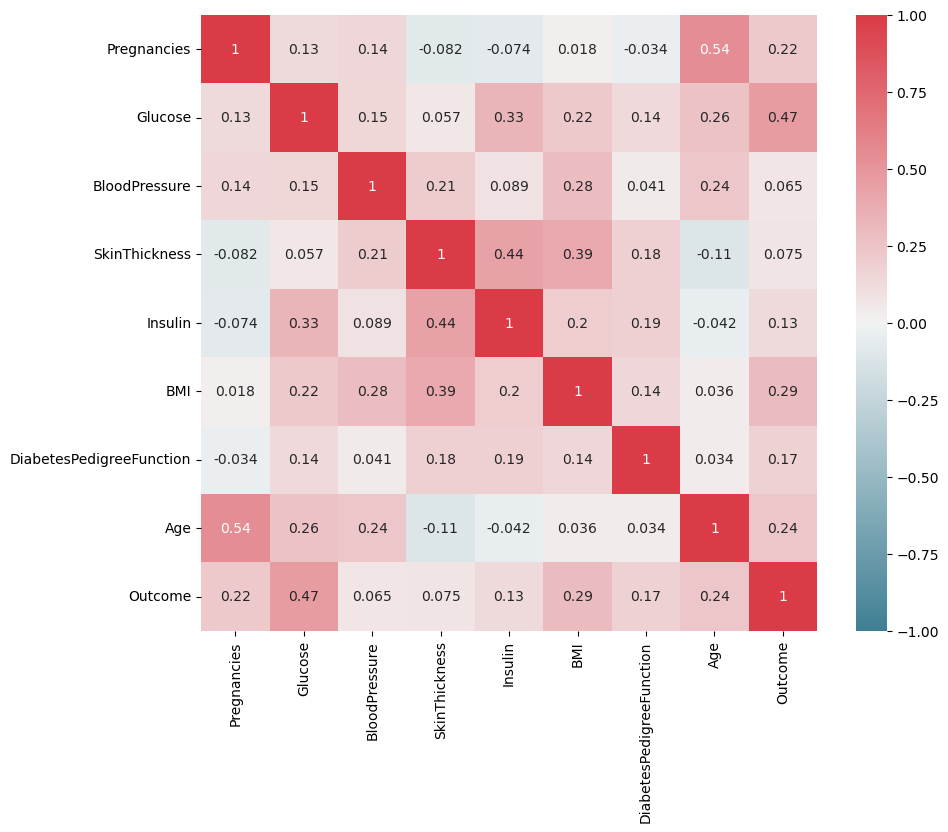

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True,),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,annot=True)

In [115]:
# Eigenvalues and Eigenvectors

# Step 1: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


# from screatch (Don't it be work ???? ) please check this function
# Compute Eigenvectors for each eigenvalue
def compute_eigenvectors(matrix, eigenvalues):
    eigenvectors = []
    
    for eigenvalue in eigenvalues:
        # Solve (A - λI) v = 0 for each eigenvalue
        # Create matrix (A - λI)
        I = np.eye(matrix.shape[0])  # Identity matrix of same size as A
        matrix_minus_lambda_I = matrix - eigenvalue * I
        
        # Solve for the null space of (A - λI)
        # Using SVD to find the null space
        _, _, vh = np.linalg.svd(matrix_minus_lambda_I)
        eigenvector = vh[-1]  # The last row of V^T gives the eigenvector
        eigenvectors.append(eigenvector)
    
    return np.array(eigenvectors)

# Get eigenvectors
eigenvectorsScretch = compute_eigenvectors(cov_matrix, eigenvalues)
print("Eigenvectors from scretch:", eigenvectorsScretch)




# Step 2: Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Display results
print("Covariance Matrix:")
print(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvectors from scretch: [[-0.21599835 -0.43675677 -0.30045538 -0.30729203 -0.33633235 -0.39734198
  -0.23763447 -0.27865556 -0.41565279]
 [-0.52744611 -0.09563451 -0.04625339  0.44839783  0.35534569  0.21031643
   0.17519467 -0.53320237 -0.15476805]
 [-0.16451225  0.39141738 -0.62970532 -0.29432599  0.14165347 -0.2519303
   0.2853247  -0.1261179   0.39461511]
 [-0.26505155 -0.58107579  0.06830645 -0.39477039  0.47845101  0.12644026
  -0.04961786  0.28875418  0.31756221]
 [-0.54064221  0.02524536 -0.16280013  0.43491377 -0.26883758 -0.16646311
  -0.09316407  0.61489048  0.06827401]
 [ 0.07851795 -0.20799965  0.32670833  0.28199843 -0.08221649 -0.57252374
  -0.05719014 -0.29942807  0.58037812]
 [-0.4567731   0.38274945  0.6078671  -0.39795678 -0.00873019 -0.24100789
   0.17162837  0.00105491 -0.17137898]
 [-0.16088274  0.32712336 -0.01105718 -0.07401586  0.09763514  0.16321892
  -0.87352658 -0.17111166  0.18167421]
 [-0.21176571 -0.10877916  0.05937792 -0.1718095  -0.65037442  0.52745

In [105]:
# ถ้าแบบว่ากูกดรัน มันจะขึ้นรันของมึงด้วยมั้ยอะ ใช่
# run เลย ตอนนี้เหมือนมึงมาทำงานบนเครื่องกุ

In [106]:
# Principal Components

# Step 1: Select top k principal components 
k = 2
top_eigenvectors = eigenvectors[:, :k]

# Step 2: Transform the dataset
transformed_data = standardized_data @ top_eigenvectors

# Display results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print(f"\nTop {k} Principal Component(s):")
print(top_eigenvectors)
print("\nTransformed Data:")
print(transformed_data)

Eigenvalues:
[2.35250159 1.77431203 1.12022513 0.88195488 0.84462341 0.73486824
 0.4884234  0.41818113 0.38491019]

Eigenvectors:
[[ 0.21599835  0.52744611  0.16451225 -0.16088274  0.21176571 -0.4567731
   0.07851795 -0.54064221  0.26505155]
 [ 0.43675677  0.09563451 -0.39141738  0.32712336  0.10877916  0.38274945
  -0.20799965  0.02524536  0.58107579]
 [ 0.30045538  0.04625339  0.62970532 -0.01105718 -0.05937792  0.6078671
   0.32670833 -0.16280013 -0.06830645]
 [ 0.30729203 -0.44839783  0.29432599 -0.07401586  0.1718095  -0.39795678
   0.28199843  0.43491377  0.39477039]
 [ 0.33633235 -0.35534569 -0.14165347  0.09763514  0.65037442 -0.00873019
  -0.08221649 -0.26883758 -0.47845101]
 [ 0.39734198 -0.21031643  0.2519303   0.16321892 -0.52745778 -0.24100789
  -0.57252374 -0.16646311 -0.12644026]
 [ 0.23763447 -0.17519467 -0.2853247  -0.87352658 -0.15655457  0.17162837
  -0.05719014 -0.09316407  0.04961786]
 [ 0.27865556  0.53320237  0.1261179  -0.17111166  0.20428857  0.00105491
  -0.29

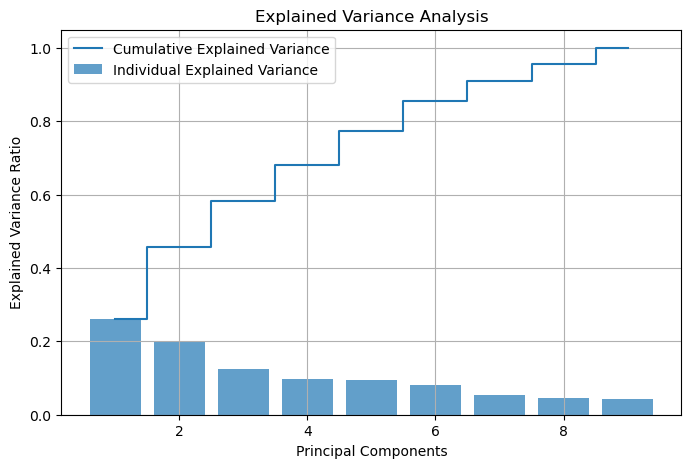

Eigenvalues:
[2.35250159 1.77431203 1.12022513 0.88195488 0.84462341 0.73486824
 0.4884234  0.41818113 0.38491019]

Explained Variance Ratio:
[0.26138907 0.19714578 0.12446946 0.09799499 0.09384705 0.08165203
 0.05426927 0.04646457 0.0427678 ]

Cumulative Explained Variance:
[0.26138907 0.45853485 0.58300431 0.68099929 0.77484634 0.85649836
 0.91076763 0.9572322  1.        ]


In [107]:
# Explained Variance Analysis

# Step 1: Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Step 2: Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 3: Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(eigenvalues) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Analysis')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Display results
print("Eigenvalues:")
print(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

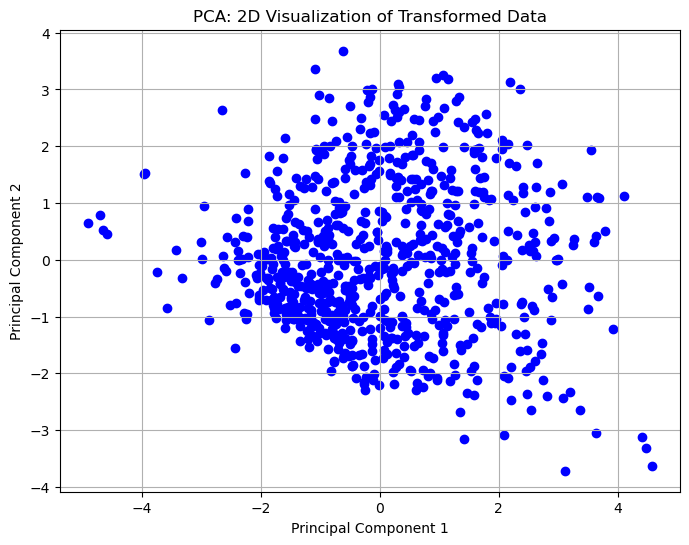

Transformed Data (2D):
            0         1
0    1.755803  1.111019
1   -1.506440 -0.559041
2    0.650398  1.928320
3   -1.586364 -1.064381
4    2.481757 -2.358026
..        ...       ...
763  1.282233  1.210399
764 -0.501954 -0.673696
765 -0.573715  0.033794
766 -0.172587  1.322031
767 -1.320407 -1.026819

[768 rows x 2 columns]


In [108]:
# Visualization
# transformed_data = np.random.rand(768, 1)
# Step 7: Plot the transformed 2D data
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[0], transformed_data[1], color='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization of Transformed Data')
plt.grid(True)
plt.show()

# Display results (optional)
print("Transformed Data (2D):")
print(transformed_data)


In [109]:
transformed_data.shape


(768, 2)

In [110]:
print(transformed_data)

            0         1
0    1.755803  1.111019
1   -1.506440 -0.559041
2    0.650398  1.928320
3   -1.586364 -1.064381
4    2.481757 -2.358026
..        ...       ...
763  1.282233  1.210399
764 -0.501954 -0.673696
765 -0.573715  0.033794
766 -0.172587  1.322031
767 -1.320407 -1.026819

[768 rows x 2 columns]


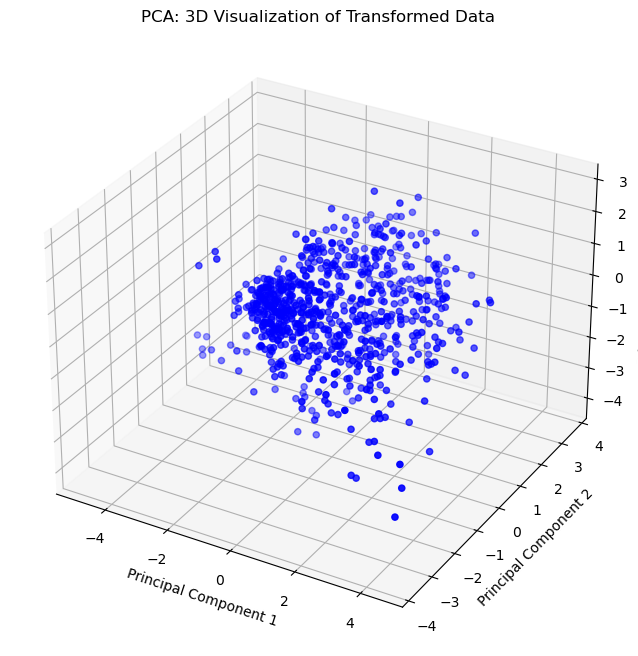

Transformed Data (3D):
            0         1         2
0    1.755803  1.111019 -0.208655
1   -1.506440 -0.559041  0.650204
2    0.650398  1.928320 -2.006433
3   -1.586364 -1.064381  0.474133
4    2.481757 -2.358026 -2.923610
..        ...       ...       ...
763  1.282233  1.210399  2.047863
764 -0.501954 -0.673696  0.631801
765 -0.573715  0.033794  0.419380
766 -0.172587  1.322031 -1.124215
767 -1.320407 -1.026819  0.785933

[768 rows x 3 columns]


In [111]:
# 3D for optional 

from mpl_toolkits.mplot3d import Axes3D

# Step 5: Select top 3 principal components (k=3)
top_eigenvectors_3d = eigenvectors[:, :3]

# Step 6: Transform the data into the new 3D space (project data onto top 3 eigenvectors)
transformed_data_3d = standardized_data @ top_eigenvectors_3d

# Step 7: Plot the transformed 3D data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[0], transformed_data_3d[1], transformed_data_3d[2], color='blue', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: 3D Visualization of Transformed Data')

plt.show()

# Display results (optional)
print("Transformed Data (3D):")
print(transformed_data_3d)

Eigenvalues (Your Implementation): [2.35250159 1.77431203]
Eigenvalues (Sklearn): [2.35556873 1.77662535]

Transformed Data (Your Implementation):
          0         1
0  1.755803  1.111019
1 -1.506440 -0.559041
2  0.650398  1.928320
3 -1.586364 -1.064381
4  2.481757 -2.358026

Transformed Data (Sklearn):
[[-1.75694707 -1.11174258]
 [ 1.50742148  0.55940565]
 [-0.65082201 -1.92957633]
 [ 1.58739782  1.06507465]
 [-2.48337392  2.35956252]]

Explained Variance Ratio (Sklearn): [0.26138907 0.19714578]


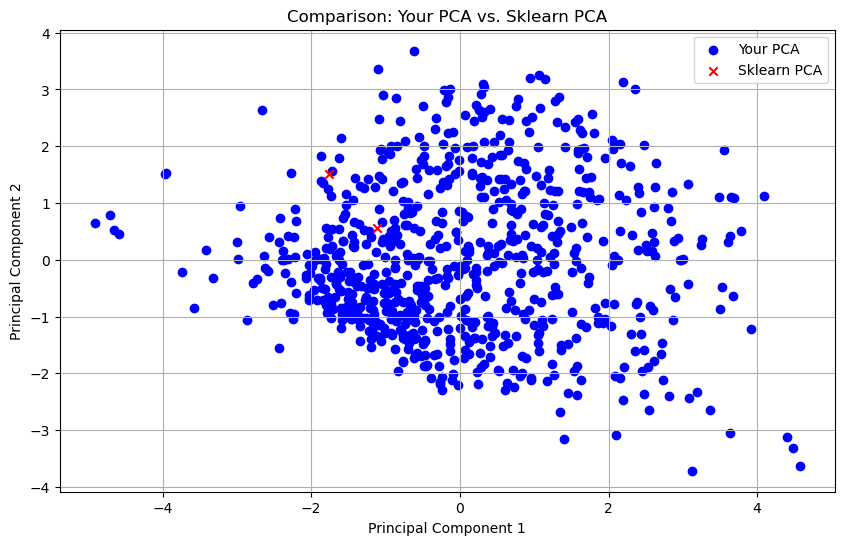

In [112]:
# Compare with libary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




# Use Sklearn's StandardScaler for consistent results
scaler = StandardScaler()
standardized_data_sklearn = scaler.fit_transform(data)

### 2. Compute PCA with your implementation
# Covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Transform data using top 2 principal components
top_eigenvectors = eigenvectors[:, :2]
transformed_data = standardized_data @ top_eigenvectors

### 3. Compute PCA with Sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(standardized_data_sklearn)

# Extract eigenvalues and explained variance ratio from Sklearn
sklearn_eigenvalues = pca.explained_variance_
sklearn_explained_variance_ratio = pca.explained_variance_ratio_

### 4. Compare Results

# Compare Eigenvalues
print("Eigenvalues (Your Implementation):", eigenvalues[:2])
print("Eigenvalues (Sklearn):", sklearn_eigenvalues)

# Compare Transformed Data
print("\nTransformed Data (Your Implementation):")
print(transformed_data[:5])  # Show first 5 samples
print("\nTransformed Data (Sklearn):")
print(X_pca[:5])  # Show first 5 samples

# Compare Explained Variance Ratios
print("\nExplained Variance Ratio (Sklearn):", sklearn_explained_variance_ratio)

### 5. Plot Results for Visual Confirmation

# Plot your implementation vs. Sklearn's PCA
plt.figure(figsize=(10, 6))

plt.scatter(transformed_data[0], transformed_data[1], color='blue', label='Your PCA')
plt.scatter(X_pca[0], X_pca[1], color='red', marker='x', label='Sklearn PCA')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Comparison: Your PCA vs. Sklearn PCA')
plt.legend()
plt.grid(True)
plt.show()
